In [1]:
import numpy as np 
import math
from scipy.io.wavfile import read  #para leer archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal
import pywt#libreria para trabajar con onditas
from scipy.signal import qmf, daub
import scipy.linalg



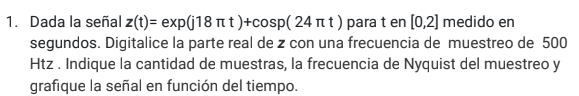

La señal tiene  1000 muestras.
Su frecuencia de Nyquist será:  150.79644737231007


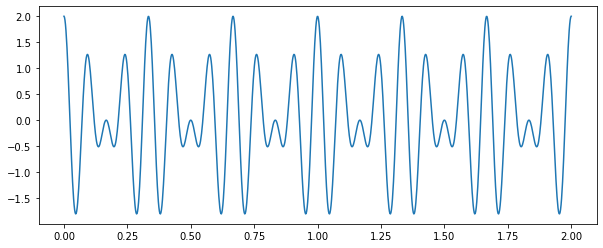

In [19]:
pi=np.pi
j=complex(0,1)
M=2*fm
tn= np.linspace(0,2,M)
z=np.cos(18*pi*tn)+j*np.sin(18*pi*tn)+np.cos(24*pi*tn)
zreal=np.real(z)
fm=500 #500 muestras por segundo
fny=2*(24*pi) #frecuencia de nyquist, el doble de la frecuencia máxima de la señal
print('La señal tiene ',fm*2,'muestras.'
      '\nSu frecuencia de Nyquist será: ',fny)

plt.figure(figsize=(10,4))
plt.plot(tn,zreal)
plt.show()

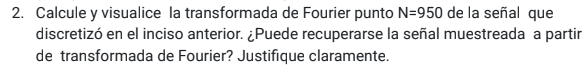

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


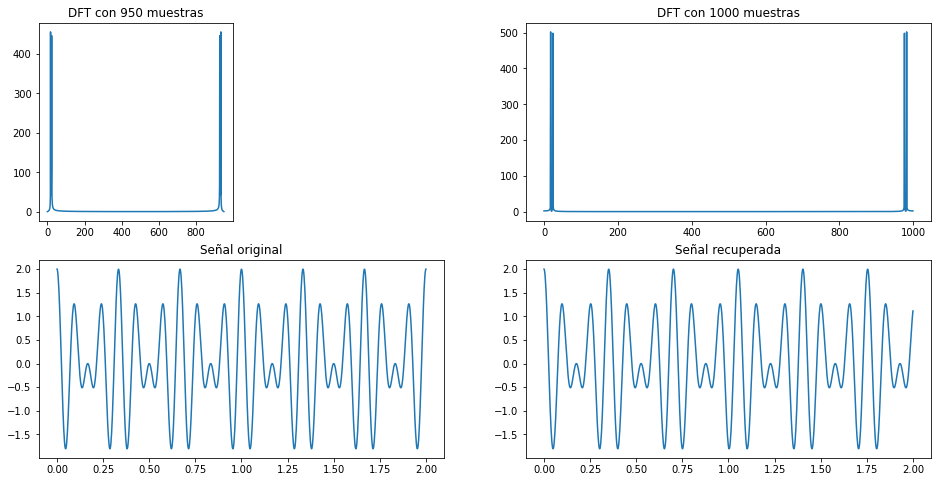

In [41]:
N=950
v=np.arange(N)
v1=np.arange(M)
DFT=fft(zreal,N)
DFTreal=fft(zreal,M)
zrecuperada=ifft(DFT)
vtiem=np.linspace(0,2,N)

plt.figure(figsize=(16,8))
plt.subplot(241),plt.plot(v,abs(DFT)),plt.title('DFT con 950 muestras')
plt.subplot(222),plt.plot(v1,abs(DFTreal)),plt.title('DFT con 1000 muestras')
plt.subplot(223),plt.plot(tn,zreal),plt.title('Señal original')
plt.subplot(224),plt.plot(vtiem,(zrecuperada)),plt.title('Señal recuperada')
plt.show()

#no recuperaría la señal completa ya que entre la muestreada y la dft hay una diferencia de 50 muestras, es decir que entre la señal zreal y la transformada inversa de DFT habría diferencias
#de hecho al visualizar la misma transformada pero con M muestras, es decir con 1000 muestras, se encuentra claro que hubo pérdida de información entre la dft.N y la original, hubo submuestreo, ya que por lo enos yo hubiese necesitado 1000 muestras o más de 1000 para reconstruir la señal



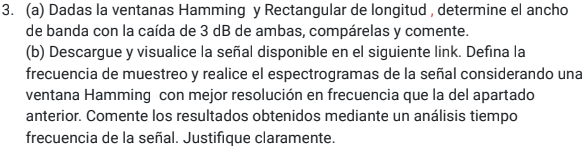

[125] 

La caída a 3dB normalizada será: 0.02080524936152181
La caída a 3dB normalizada será: 0.02080524936152181


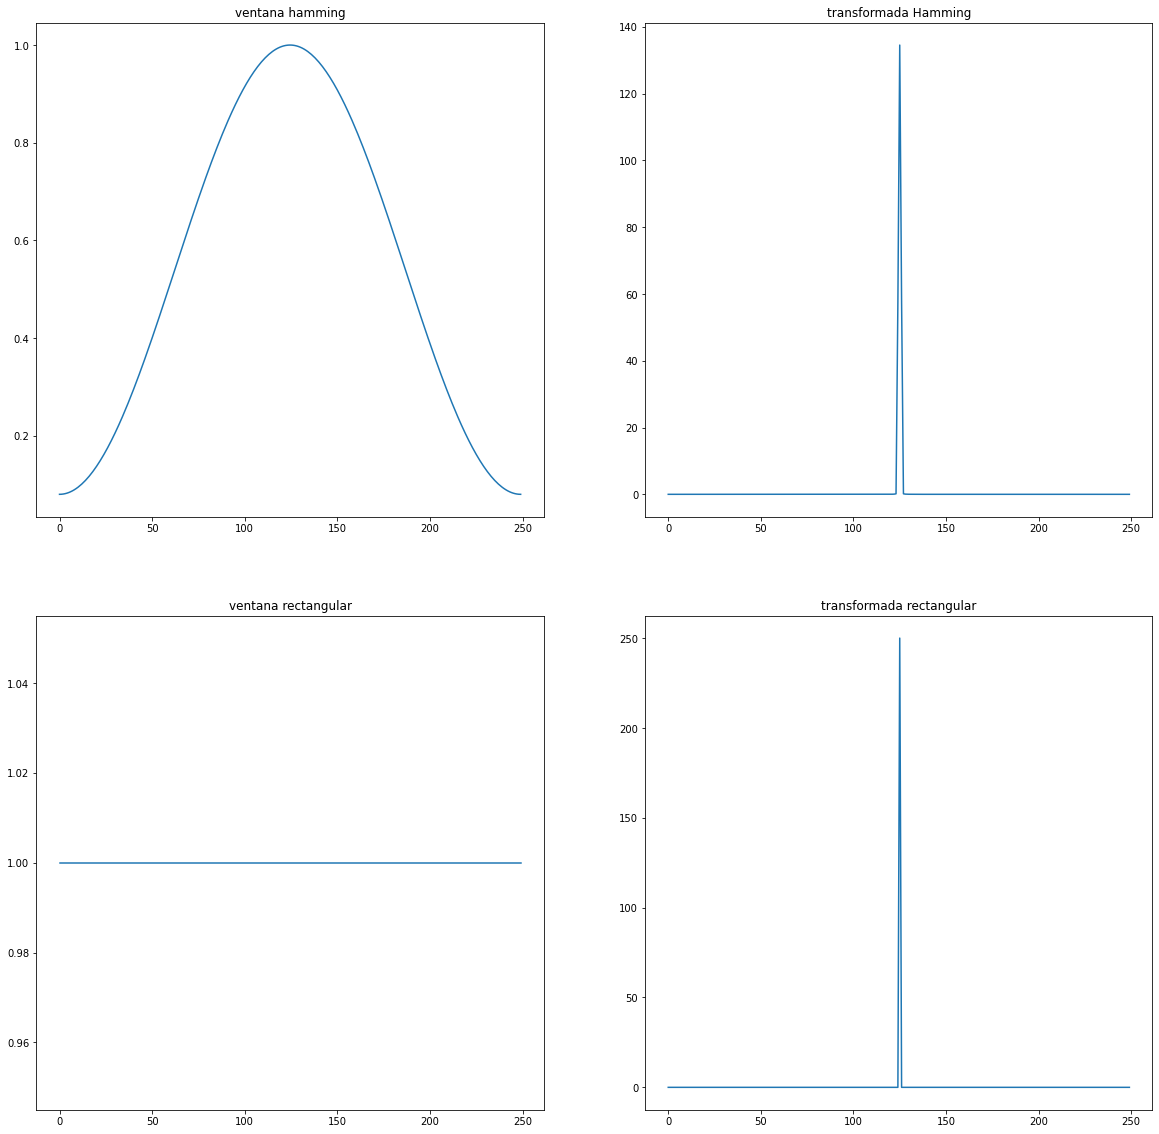

In [64]:
ham=  signal.hamming(250) #ventana Hammming
rect=signal.boxcar(250)

#hamming
#transformada de fourier
fham=fftshift(fft(ham,250))
#la paso a db
fhamdB=20*np.log10(1+abs(fham))
#Calculamos el ancho de banda en frecuencia usando una caida de 3dB
fham3dB=(np.max(fhamdB)-3)*np.ones(500)
#defino L
L=np.linspace(-np.pi, np.pi + np.pi*2/500 ,500)
#  Determino la altura máxima de los lóbulos laterales de la TF
picosw1=signal.find_peaks(abs(fhamdB)) 
#los picos estan en picosw1
lugares_picosw1 = picosw1[0]
altura_de_los_picos=abs(fhamdB[lugares_picosw1])
#su altura es altura_de_los_picos
#las ordeno
picordw1= -np.sort(-abs(fhamdB[lugares_picosw1])) #alturas max-min
#como quiero la altura máxima de los picos laterales
print(picosw1[0],"\n")# no tomo el pico máximo porque ese representa 
#normalizo para hallar el valor de la caida a 3db
fhamNorm=abs(fham/np.max(fham)) #transformada(centrada), ahora normalizada, 
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707
print('La caída a 3dB normalizada será:',sum(fhamNorm>0.707)/302*2*np.pi) #calcula la caida a 3dB


#rect
#transformada de fourier
frec=fftshift(fft(rect,250))
#la paso a db
frecdB=20*np.log10(1+abs(frec))
#Calculamos el ancho de banda en frecuencia usando una caida de 3dB
frec3dB=(np.max(frecdB)-3)*np.ones(500)
#defino L
L=np.linspace(-np.pi, np.pi + np.pi*2/500 ,500)
#  Determino la altura máxima de los lóbulos laterales de la TF
picosw11=signal.find_peaks(abs(frecdB)) 
#los picos estan en picosw1
lugares_picosw11 = picosw11[0]
altura_de_los_picos1=abs(frecdB[lugares_picosw11])
#su altura es altura_de_los_picos
#las ordeno
picordw11= -np.sort(-abs(frecdB[lugares_picosw11])) #alturas max-min
#como quiero la altura máxima de los picos laterales
#print(picosw11[0],"\n")# no tomo el pico máximo porque ese representa 
#normalizo para hallar el valor de la caida a 3db
frecNorm=abs(frec/np.max(frec)) #transformada(centrada), ahora normalizada, 
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707
print('La caída a 3dB normalizada será:',sum(frecNorm>0.707)/302*2*np.pi) #calcula la caida a 3db




t=np.arange(250)
#grafico

plt.figure(figsize=(20,20))
plt.subplot(221),plt.plot(t,ham),plt.title('ventana hamming')
plt.subplot(222),plt.plot(abs(fham)),plt.title('transformada Hamming')
plt.subplot(223),plt.plot(t,rect),plt.title('ventana rectangular')
plt.subplot(224),plt.plot(abs(frec)),plt.title('transformada rectangular')
plt.show()

la longitud del vector es:  2000 
 
la frecuencia de muestreo es  20000 Hertz, es decir 20000 muestras por segundo
 
y el audio está guardado en el vector "señal": 
 
 [ 16002  16001  16001 ... -15989   4994  13170]
El audiol tiene una duración de 0.1 segundos 
 
El audio tiene 950 muestras 



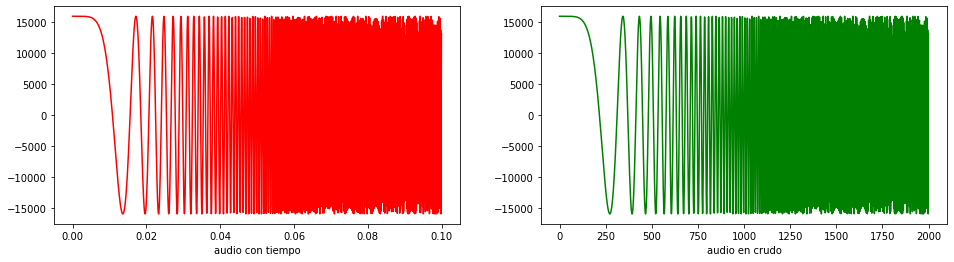

TypeError: ignored

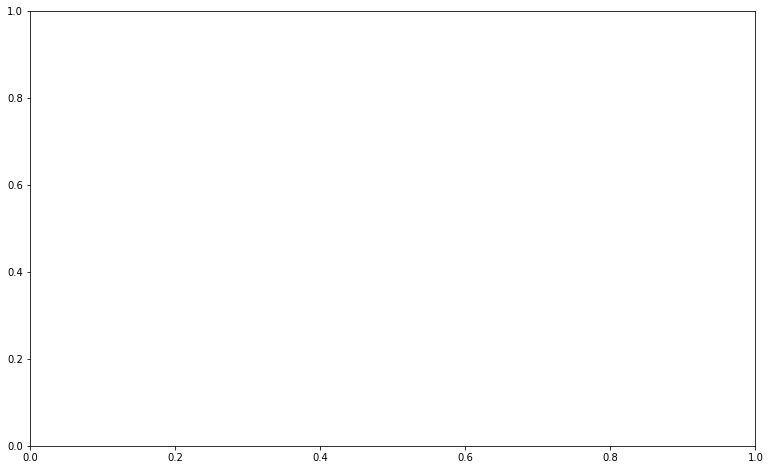

In [82]:
#leo y guardo el audio

audio=read('z2.wav')
fm=audio[0] #frecuencia de muestreo

señal=audio[1][:,0] #audio en variable
duracion=len(señal)/fm

L=len(señal)
t=np.arange(L)/fm #vector de tiempos discretizados 
print('la longitud del vector es: ',len(señal),
      '\n \nla frecuencia de muestreo es ',fm,'Hertz, es decir',fm,'muestras por segundo'
      '\n \ny el audio está guardado en el vector "señal": \n \n',señal)
print('El audiol tiene una duración de',duracion,'segundos \n',
      '\nEl audio tiene',N,'muestras \n')
plt.figure(figsize=(16,4))
plt.subplot(121),plt.plot(t, señal ,color='r', label='Audio con tiempo',),plt.xlabel('audio con tiempo')
plt.subplot(122),plt.plot(señal,color='g', label='Audio en crudo',),plt.xlabel('audio en crudo')
plt.show()


hammejorada=  signal.hamming(1000) #ventana Hammming


f1, t1, Sxx1 = signal.spectrogram(señal,fs=fm, window=hammejorada,  nfft=None, noverlap=None) #espectograma

fig,axs = plt.subplots(1,1,figsize=(13,8))
fig1=axs[1].pcolormesh(t1, f1, Sxx1)
axs[1].set_title('Espectrograma de s con rectangular')
axs[1].set_ylabel('Frecuencia en [0, FM/2)')
fig.colorbar(fig1, ax=axs[1])


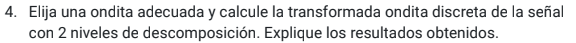

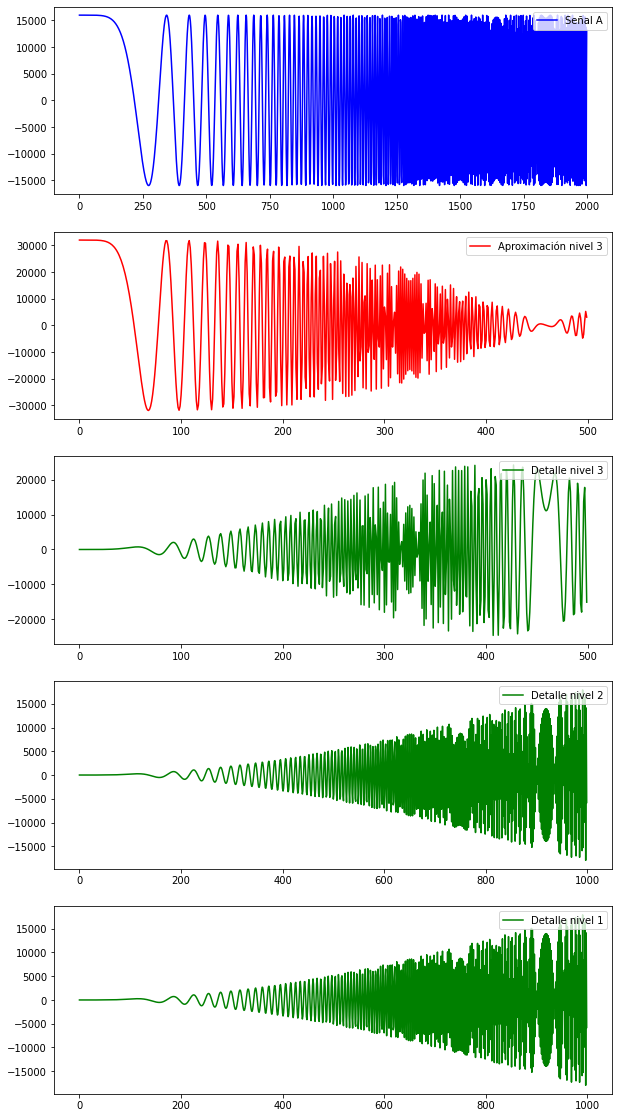

In [87]:
coef = pywt.wavedec(señal, 'haar',level=2)
a3=coef[0]
d3=coef[1]
d2=coef[2]



fig, axs = plt.subplots(5,1,figsize=(10,20))
axs[0].plot(señal, color='blue', label='Señal A')
axs[0].legend(loc='upper right')
axs[1].plot(a3, color='red', label='Aproximación nivel 3')
axs[1].legend(loc='upper right')
axs[2].plot(d3, color='green', label='Detalle nivel 3') 
axs[2].legend(loc='upper right')
axs[3].plot(d2, color='green', label='Detalle nivel 2') 
axs[3].legend(loc='upper right')
axs[4].plot(d1, color='green', label='Detalle nivel 1') 
axs[4].legend(loc='upper right')